# Data

In [1]:
%%time
import os
import glob
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from MSM_Scripts import simulateData_NumPy

# Set kbar
kbar = 4

# Simulated data, 60% in-sample for estimation, 40% out-of-sample for forecasts
b = 6
m0 = 1.6
gamma_kbar = 0.8
sig = 2/np.sqrt(252)    
T = 7087            
dat1 = simulateData_NumPy(b,m0,gamma_kbar,sig,kbar,T)
dat1E = dat1[0:4252,]
dat1F = dat1[4252:,]

# DEXJPUS, 60% in-sample for estimation, 40% out-of-sample for forecasts
dat2 = pd.read_csv("DEXJPUS.csv")                                   
dat2 = dat2.loc[dat2.DEXJPUS != "."].DEXJPUS.astype(float)
dat2 = np.array(dat2)
dat2_rtn = dat2[0:-1]
dat2 = np.log(dat2[1:])-np.log(dat2[0:-1])
dat2 = dat2[dat2 != 0]
dat2 = dat2[:,np.newaxis]
dat2E = dat2[0:4252,]
dat2F = dat2[4252:,]


dat1E.shape, dat1F.shape, dat2E.shape, dat2F.shape

Wall time: 4.22 s


((4252, 1), (2835, 1), (4252, 1), (2835, 1))

# Stats

In [2]:
from scipy import stats

k = stats.describe(dat2)
print("Descriptive statistics for DEXJPUS: ","\n"
      "Number of observations = ",k.nobs,"\n"
      "Minimum, Maximum = ",str(k.minmax),"\n"
      "Mean = %.5f" %  k.mean,"\n"
      "Variance = %.5f" %  k.variance,"\n"
      "Standard deviation = %.5f" %  k.variance**0.5,"\n"
      "Skewness = %.5f" %  k.skewness,"\n"
      "Kurtosis = %.5f" %  k.kurtosis)

j = stats.describe(dat1)
print("Descriptive statistics for Simulated Data: ","\n"
      "Number of observations = ",j.nobs,"\n"
      "Minimum, Maximum = ",str(j.minmax),"\n"
      "Mean = %.5f" %  j.mean,"\n"
      "Variance = %.5f" %  j.variance,"\n"
      "Standard deviation = %.5f" %  j.variance**0.5,"\n"
      "Skewness = %.5f" %  j.skewness,"\n"
      "Kurtosis = %.5f" %  j.kurtosis)

Descriptive statistics for DEXJPUS:  
Number of observations =  7087 
Minimum, Maximum =  (array([-0.05630211]), array([0.06255581])) 
Mean = -0.00011 
Variance = 0.00004 
Standard deviation = 0.00666 
Skewness = -0.38715 
Kurtosis = 5.46706
Descriptive statistics for Simulated Data:  
Number of observations =  7087 
Minimum, Maximum =  (array([-1.0486859]), array([0.91908058])) 
Mean = 0.00119 
Variance = 0.02032 
Standard deviation = 0.14253 
Skewness = 0.07350 
Kurtosis = 6.37586


# Time series analysis

In [3]:
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted")

def tsdisplay(y, figsize = (16,9), title = "", color = ""):
    tmp_data = pd.Series(y)
    
    fig = plt.figure(figsize = figsize)
    # Plot time series
    tmp_data.plot(ax = fig.add_subplot(311), title = "$Log\ returns\ time\ series:\ " + title + "$", legend = False, color=color, linewidth=0.5, alpha=0.75)
    # Plot ACF:
    sm.graphics.tsa.plot_acf(tmp_data, lags = 20, zero = False, color=color, ax = fig.add_subplot(323))
    # Plot PACF:
    sm.graphics.tsa.plot_pacf(tmp_data, lags = 20, zero = False, color=color, ax = fig.add_subplot(324))
    # QQ plot of the data:
    sm.qqplot(tmp_data, line='s', color=color, ax = fig.add_subplot(325)) 
    plt.title("Q-Q Plot")
    # Plot residual histogram:
    fig.add_subplot(326).hist(tmp_data, color=color, bins = 120)
    plt.title("Histogram")
    # Fix layout of the plots:
    plt.tight_layout()

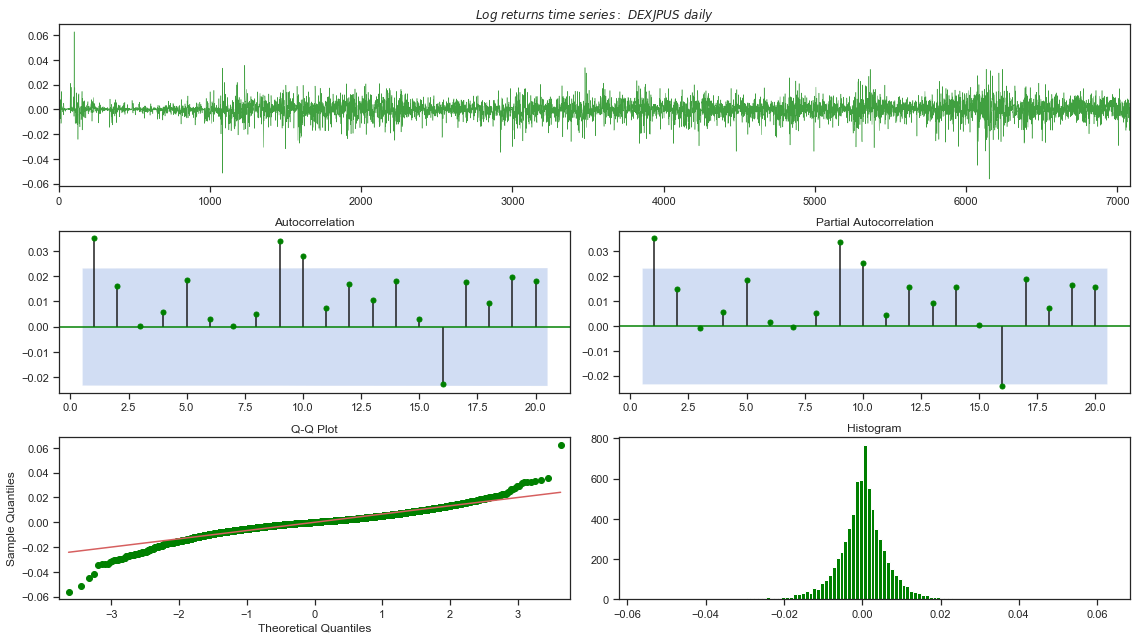

In [4]:
s = np.array(dat2).astype(float)
s = s[s != 0].copy()
tsdisplay(s, title = "DEXJPUS\ daily", color='green')

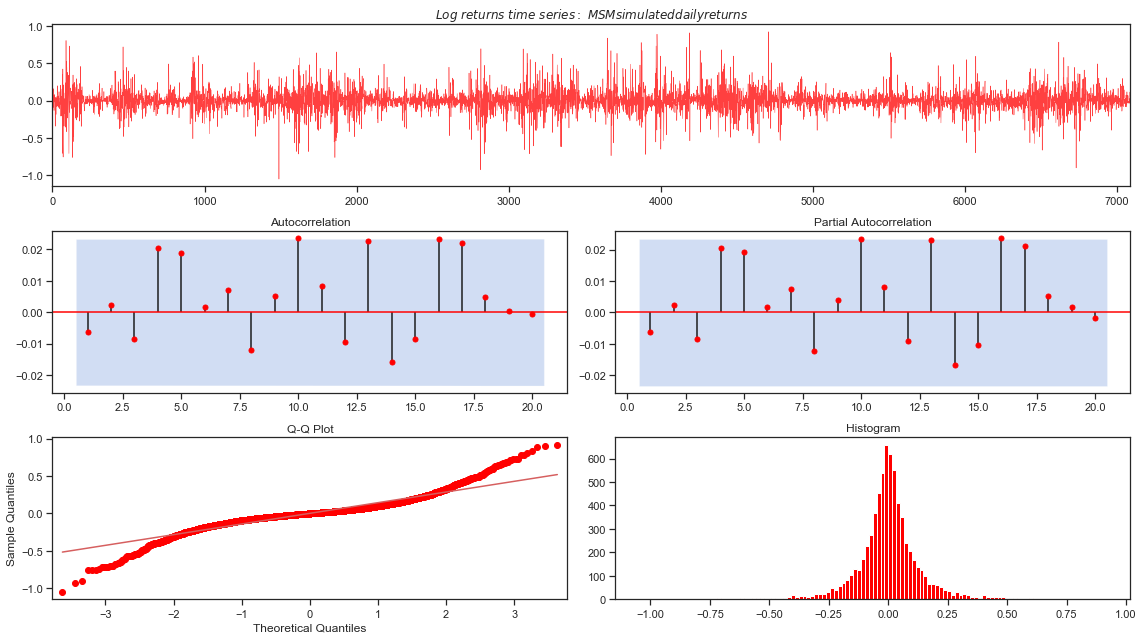

In [5]:
s = np.array(dat1).astype(float)
s = s[s != 0].copy()
tsdisplay(s, title = "MSM simulated daily returns", color='red')

# Model estimation

**DEXJPUS**

In [11]:
%%time
import numpy as np
from MSM_03 import glo_min, loc_min, g_LLb_h, g_LL, _LL, g_pi_t, _t, pred, g_t, s_p, unpack 

data = dat2E               # DEXJPUS
niter = 1
temperature = 1.0
stepsize = 1.0

parameters, LL, niter, output = glo_min(kbar, data, niter, temperature, stepsize)

# name parameters for later use:
b_dex = parameters[0]
m_0_dex = parameters[1]
gamma_kbar_dex = parameters[2]
sigma_dex = parameters[3]
LL_dex = LL

print("Parameters from glo_min for DEXJPUS: ", "\n"
      "kbar = ", kbar,"\n"
      'b = %.5f' % b_dex,"\n"
      'm_0 = %.5f' % m_0_dex,"\n"
      'gamma_kbar = %.5f' % gamma_kbar_dex,"\n"
      'sigma = %.5f' % sigma_dex,"\n"
      'Likelihood = %.5f' % LL_dex,"\n"
      "niter = " , niter,"\n"
      "output = " , output,"\n")

Parameters from glo_min for DEXJPUS:  
kbar =  4 
b = 9.26033 
m_0 = 1.62308 
gamma_kbar = 0.71612 
sigma = 0.00484 
Likelihood = -16441.86030 
niter =  1 
output =  ['requested number of basinhopping iterations completed successfully'] 

Wall time: 1.65 s
